<a href="https://colab.research.google.com/github/nathalylorena/Data-mining/blob/main/dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8

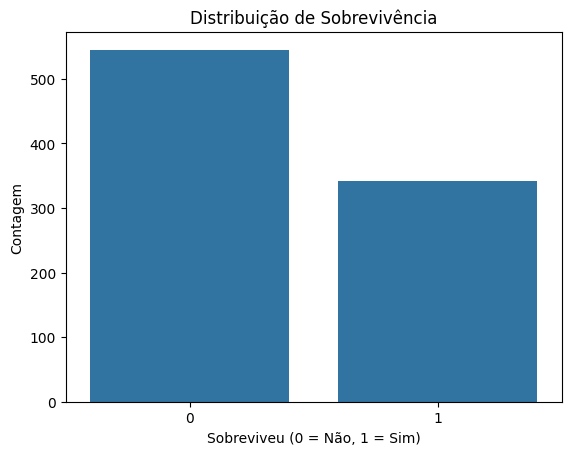

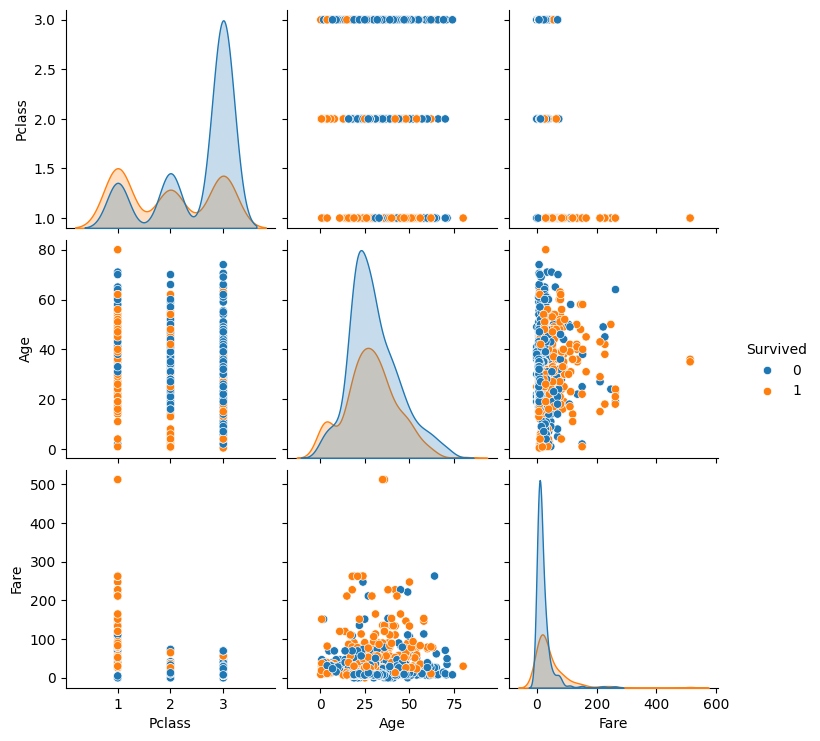

ValueError: could not convert string to float: 'Mr. Owen Harris Braund'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importando o conjunto de dados Titanic
url_titanic = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
df_titanic = pd.read_csv(url_titanic)

# Exibindo as primeiras linhas do conjunto de dados
print(df_titanic.head())

# Informações básicas sobre o conjunto de dados
print(df_titanic.info())

# Estatísticas descritivas
print(df_titanic.describe())

# Visualização da distribuição dos sobreviventes (Survived)
sns.countplot(x='Survived', data=df_titanic)
plt.title('Distribuição de Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

# Pairplot para visualizar relações entre algumas características
sns.pairplot(df_titanic, hue='Survived', vars=['Pclass', 'Age', 'Fare'])
plt.show()

# Heatmap da matriz de correlação
corr_matrix = df_titanic.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Boxplot para visualizar a distribuição de idade por sobrevivência
plt.figure(figsize=(12, 8))
sns.boxplot(x='Survived', y='Age', data=df_titanic)
plt.title('Idade por Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

# Preenchendo valores ausentes na coluna Age
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)

# Transformação de variáveis categóricas em dummies
df_titanic = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked'], drop_first=True)

# Seleção de variáveis independentes (X) e dependente (y)
X = df_titanic.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df_titanic['Survived']

# Divisão dos dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão logística
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_treino, y_treino)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Avaliação do modelo
acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia: {acuracia}')

# Matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print('Matriz de Confusão:')
print(matriz_confusao)

# Relatório de classificação
relatorio_classificacao = classification_report(y_teste, y_pred)
print('Relatório de Classificação:')
print(relatorio_classificacao)

